In [4]:
import viswaternet as vis
import matplotlib.pyplot as plt
import numpy as np

In [5]:
model = vis.VisWNModel('Networks/CTown.inp')

### Demand patterns

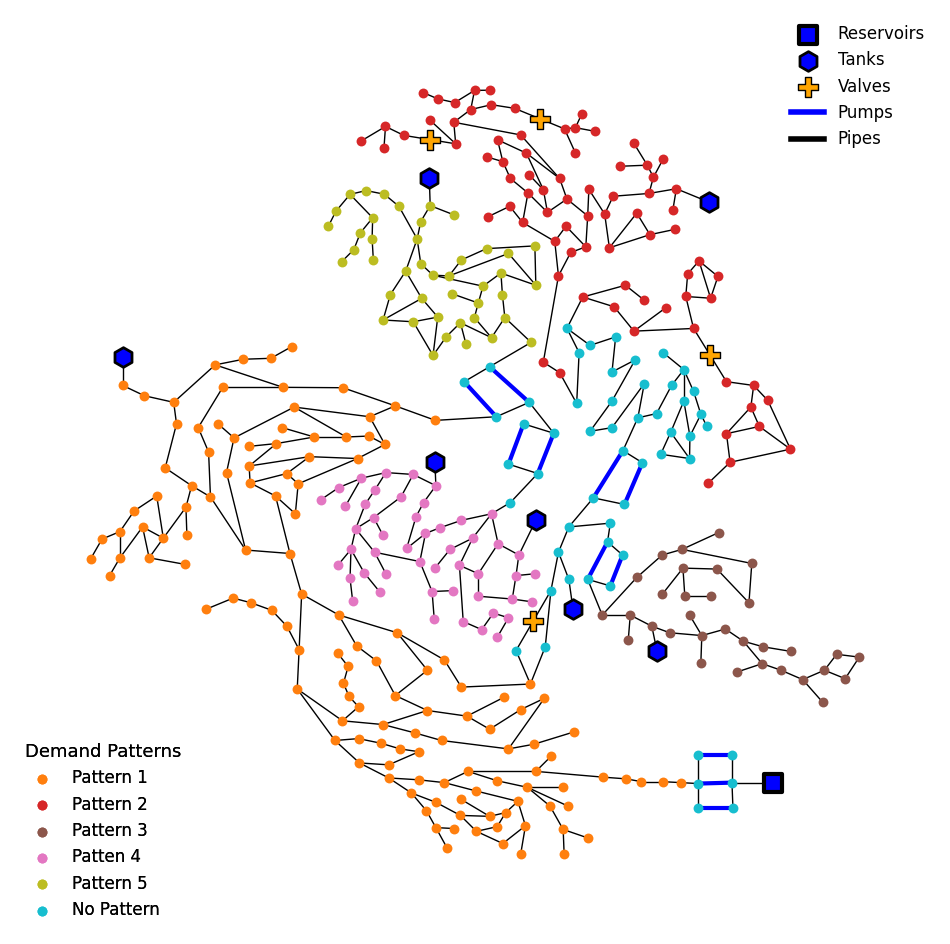

In [6]:
model.plot_unique_data(parameter = "demand_patterns", cmap = 'tab10',
                      discrete_legend_loc = 'lower left', legend_title = 'Demand Patterns',
                      legend_title_font_size = 13, font_size = 12,
                      interval_label_list = ['Pattern 1', 'Pattern 2', 'Pattern 3',
                      'Patten 4', 'Pattern 5', 'No Pattern'],
                      save_name = 'figures/example7', dpi = 400)

### Diameters

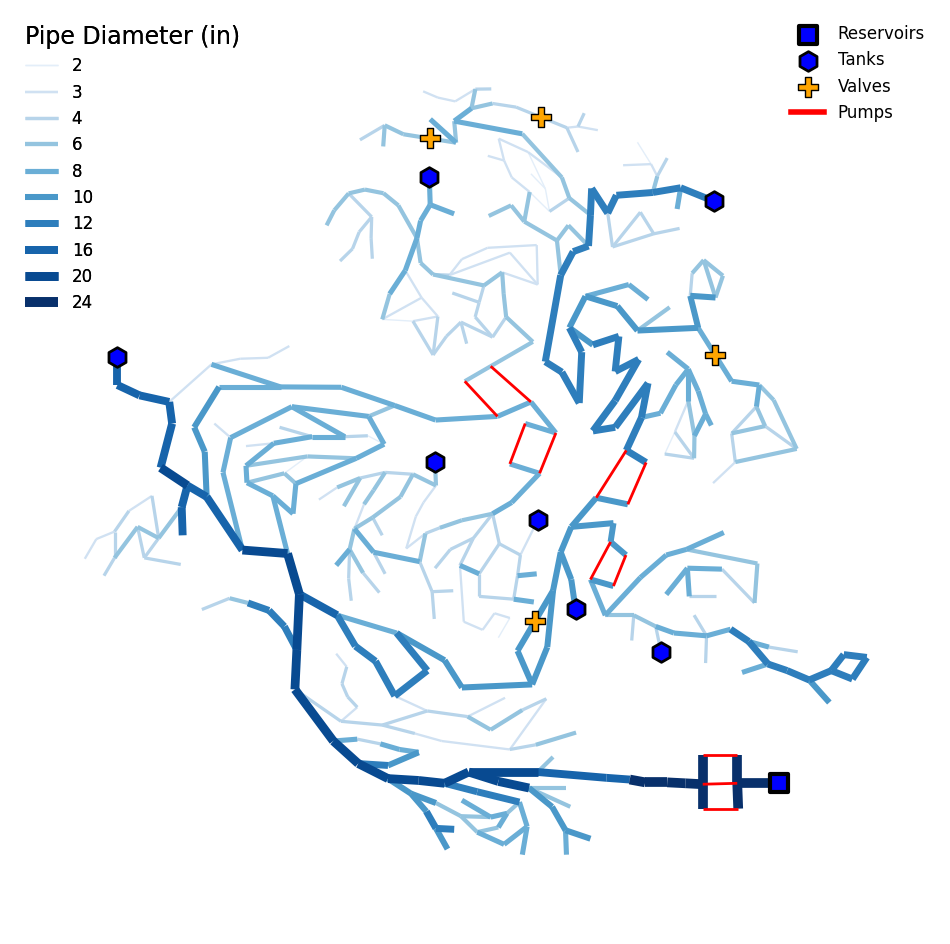

In [7]:
model.plot_unique_data(parameter = "diameter", 
                       unit = "in", 
                       interval_link_width_list = np.linspace(1,7,10),
                       cmap = "Blues", 
                       discrete_legend_loc = "upper left", 
                       legend_title = "Pipe Diameter (in)", font_size = 12,
                       legend_sig_figs = 0, 
                       pump_color = "red", 
                       pump_width = 2,
                       save_name = 'figures/example8', dpi=400)  

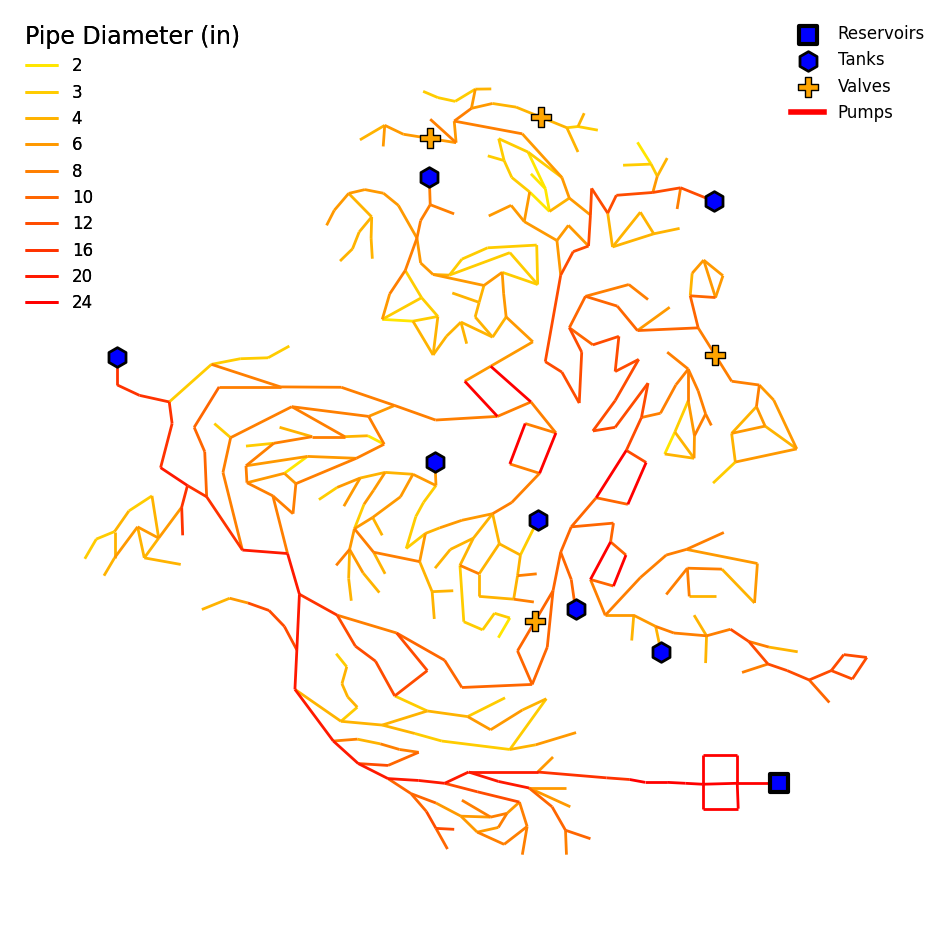

In [8]:
model.plot_unique_data(parameter = "diameter", 
                       unit = "in", 
                       data_type = 'continuous',
                       #interval_link_width_list = np.linspace(1,7,10),
                       #cmap = "Blues", 
                       discrete_legend_loc = "upper left", 
                       legend_title = "Pipe Diameter (in)", font_size = 12,
                       legend_sig_figs = 0, 
                       pump_color = "red", 
                       pump_width = 2,
                       save_name = 'figures/example8', dpi=400)  

### Tags

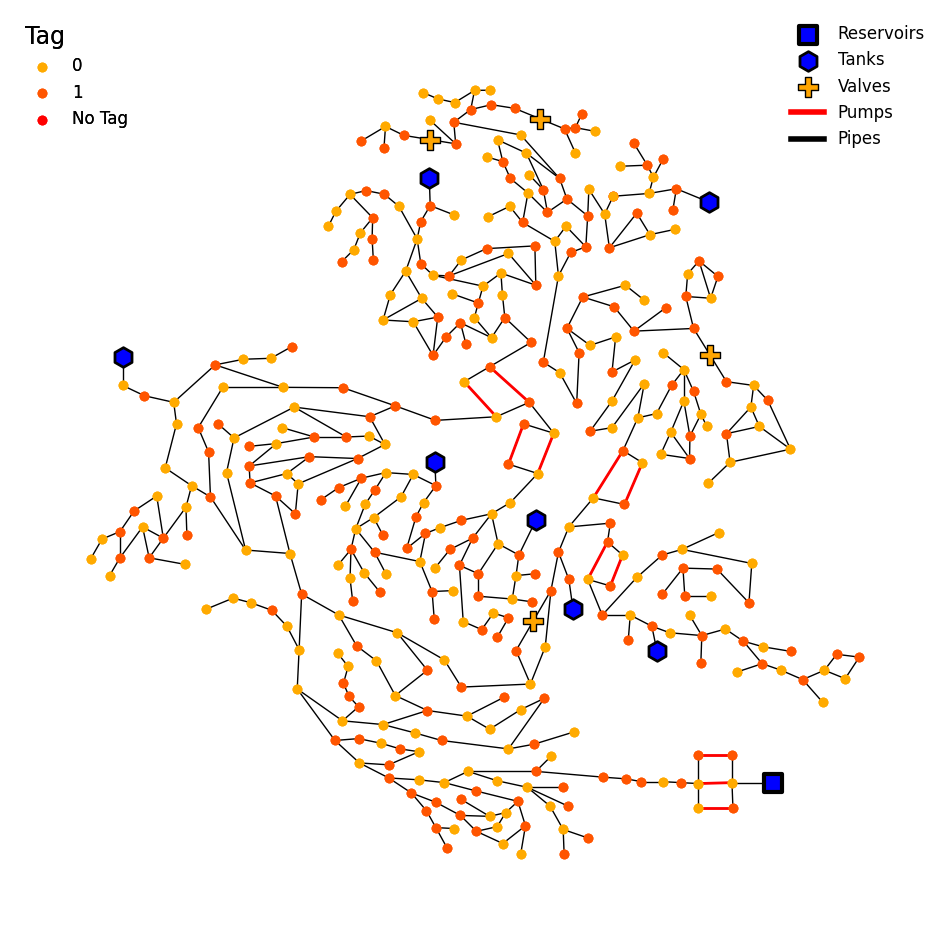

In [9]:
import wntr
wn = wntr.network.WaterNetworkModel('Networks/CTown.inp')

counter = 0
for _, junc in wn.junctions():
    junc.tag = str(counter%2)
    counter+=1
    
wn.write_inpfile(filename = 'Networks/CTown.inp')

model = vis.VisWNModel('Networks/CTown.inp')
   
model.plot_unique_data(parameter = "tag", 
                       #unit = "in", 
                       #interval_link_width_list = np.linspace(1,7,10),
                       #cmap = "Blues", 
                       discrete_legend_loc = "upper left", 
                       legend_title = "Tag", font_size = 12,
                       #legend_sig_figs = 0, 
                       pump_color = "red", 
                       pump_width = 2)  

In [10]:
model = vis.VisWNModel('Networks/CTown.inp')

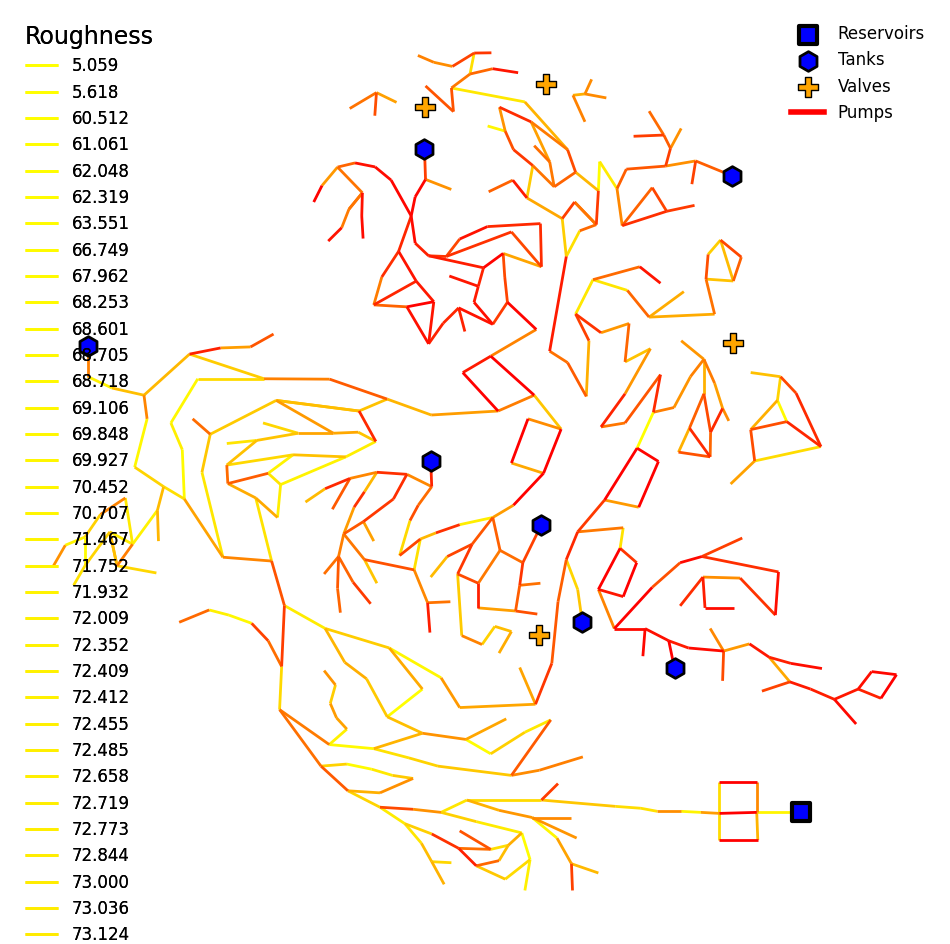

In [11]:
model.plot_unique_data(parameter = "roughness", 
                       data_type = 'continuous',
                       #unit = "in", 
                       #interval_link_width_list = np.linspace(1,7,10),
                       #cmap = "Blues", 
                       discrete_legend_loc = "upper left", 
                       legend_title = "Roughness", font_size = 12,
                       #legend_sig_figs = 0, 
                       pump_color = "red", 
                       pump_width = 2)  

### Excel data for links

#### Link - categorical. all good

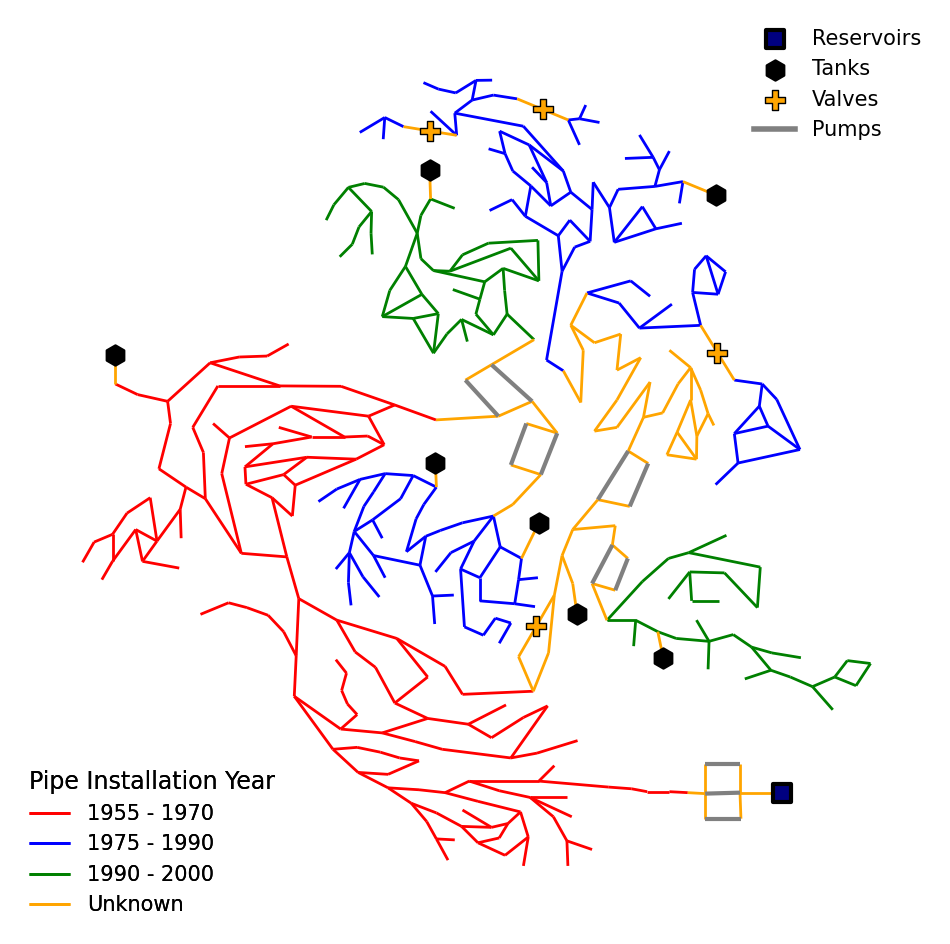

In [12]:
model.plot_unique_data(parameter='excel_data', data_file = 'Excel/CTown_pipe_ages.xlsx',
                       parameter_type='link',
                       data_type='unique',excel_columns=[0,1], discrete_legend_loc = 'lower left',
                       color_list = ["red","blue","green", "orange"],
                       pump_color = 'grey', legend_title = 'Pipe Installation Year',
                       reservoir_color = 'navy', tank_color = 'k',
                       save_name = 'figures/example9', dpi = 400)

#### Node - unique. Color list doesn't work !!!

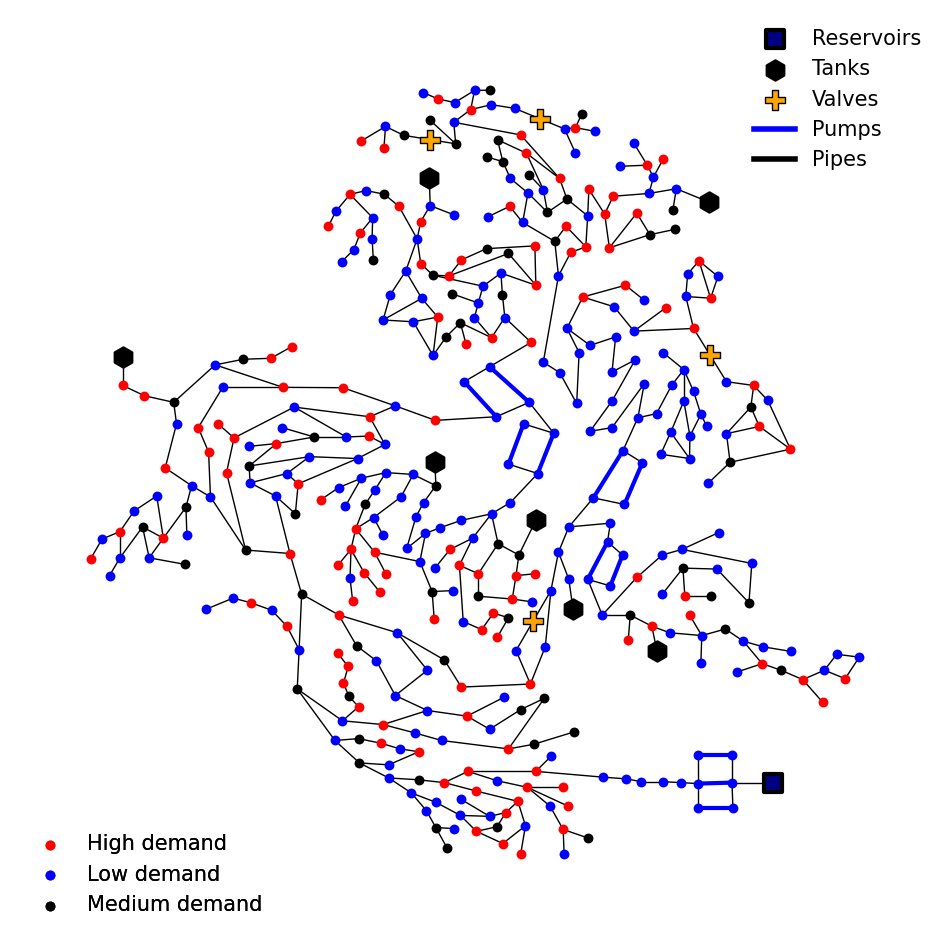

In [13]:
model.plot_unique_data(parameter='excel_data', data_file = 'Excel/node_categorical_data.xlsx',
                       parameter_type='node',
                       data_type='unique',excel_columns=[0,1], discrete_legend_loc = 'lower left',
                       color_list = ["red","blue","black"],
                       reservoir_color = 'navy', tank_color = 'k')

#### Node - continuous. doesn't show up

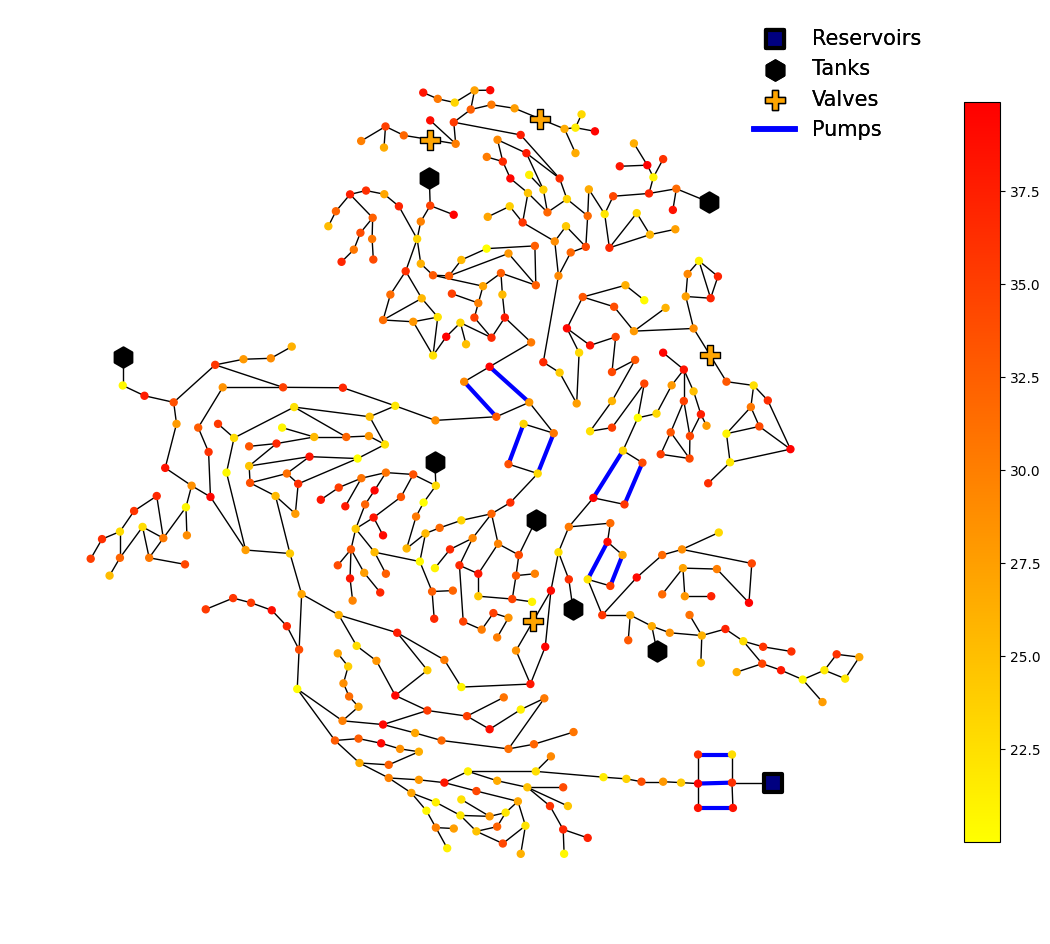

In [14]:
model.plot_unique_data(parameter='excel_data', data_file = 'Excel/node_numerical_data.xlsx',
                       parameter_type='node',
                       data_type='continuous',excel_columns=[0,1], 
                       #color_list = ["red","blue","black"],
                       reservoir_color = 'navy', tank_color = 'k')

#### Node - discrete. Color list doesn't work

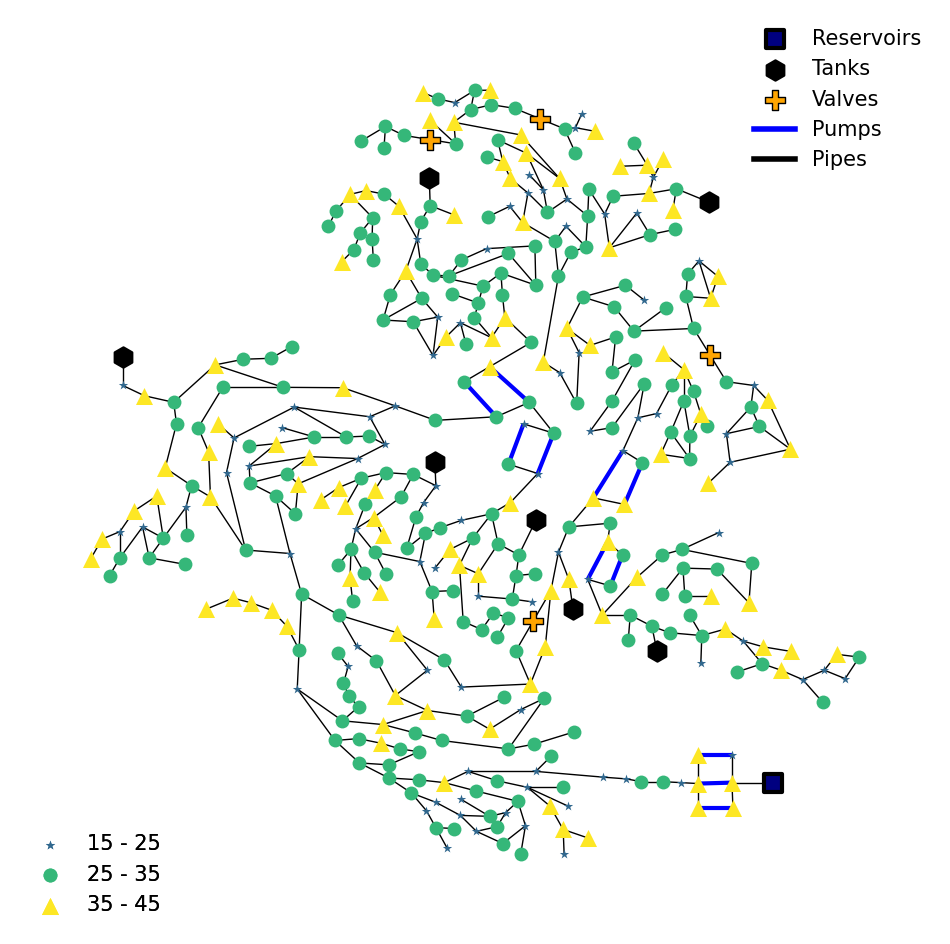

In [15]:
model.plot_unique_data(parameter='excel_data', data_file = 'Excel/node_numerical_data.xlsx',
                       parameter_type='node',
                       data_type='discrete',excel_columns=[0,1], discrete_legend_loc = 'lower left',
                       intervals = [15,25, 35, 45],
                       legend_sig_figs = 0,
                       interval_node_size_list=[50,100,150],
                       interval_node_shape_list= ['*','o','^','d'],
                       cmap = 'viridis', #color_list = ['red', 'blue', 'black'],
                       reservoir_color = 'navy', tank_color = 'k')

#### Link - discrete. all good

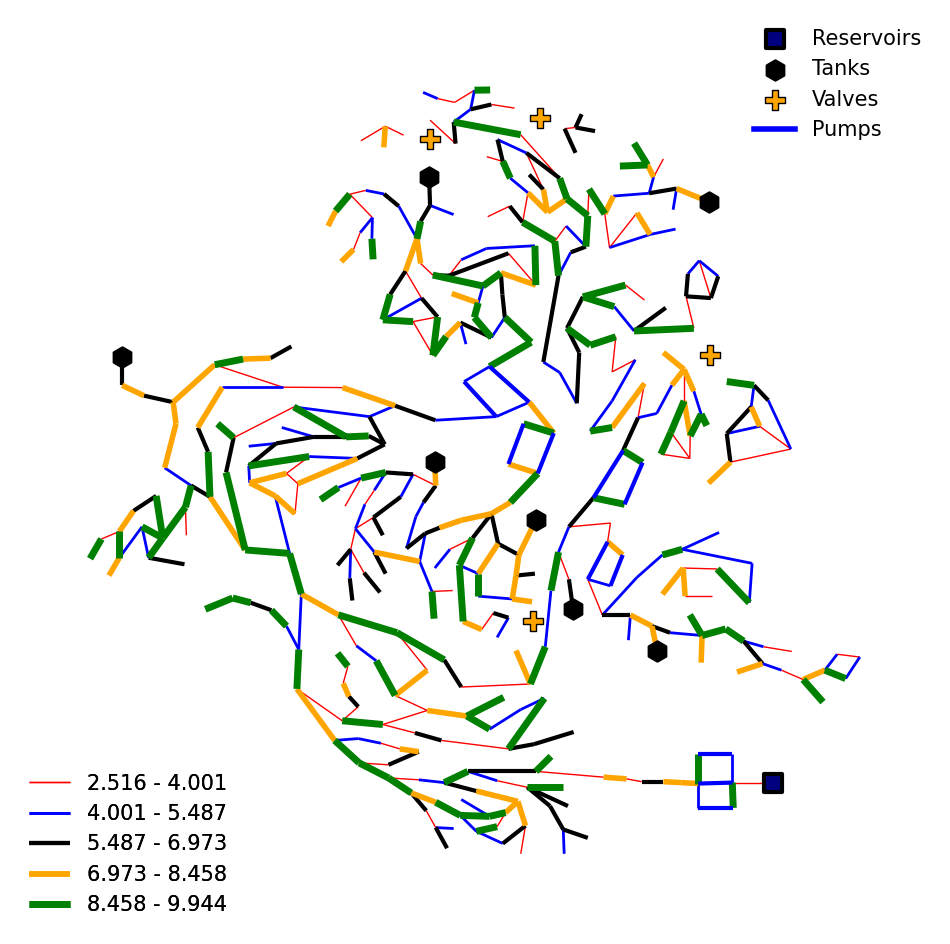

In [16]:
model.plot_unique_data(parameter='excel_data', data_file = 'Excel/link_numerical_data.xlsx',
                       parameter_type='link',
                       data_type='discrete',
                       excel_columns=[0,1], 
                       discrete_legend_loc = 'lower left',
                       interval_link_width_list = [1,2,3,4,5],
                       color_list = ['r', 'b', 'k', 'orange', 'g'],
                       cmap = 'rainbow',
                       reservoir_color = 'navy', tank_color = 'k')

### Custom data

In [17]:
import wntr
import random
import matplotlib.pyplot as plt
import numpy
import pandas as pd

wn = wntr.network.WaterNetworkModel('Networks/CTown.inp')
sim = wntr.sim.EpanetSimulator(wn)
results = sim.run_sim()

link_num_data = []
node_num_data = []
link_cat_data = []
node_cat_data = []

random.seed(1)

# Links
for pipe_name in wn.pipe_name_list:
    link_num_data.append(random.uniform(2.5, 10.0))    
    if (results.link['flowrate'].loc[:,pipe_name] < 0).any():
        link_cat_data.append('Reverse flow')
    else:
        link_cat_data.append('No reverse flow')
    
# Nodes
for junction_name, junction in wn.junctions():
    node_num_data.append(random.uniform(20.0, 40.0))    
    if junction.demand_timeseries_list[0].base_value < 0.0007:
        node_cat_data.append('Low demand')
    elif junction.demand_timeseries_list[0].base_value < 0.001  and  junction.demand_timeseries_list[0].base_value >= 0.0007:
        node_cat_data.append('Medium demand')
    else:
        node_cat_data.append('High demand')
print(node_cat_data)

['High demand', 'Medium demand', 'Medium demand', 'Low demand', 'Low demand', 'High demand', 'Low demand', 'Low demand', 'High demand', 'High demand', 'Low demand', 'Low demand', 'High demand', 'High demand', 'Low demand', 'High demand', 'High demand', 'Low demand', 'High demand', 'Low demand', 'Medium demand', 'High demand', 'Low demand', 'Medium demand', 'Medium demand', 'Low demand', 'High demand', 'Low demand', 'Low demand', 'Low demand', 'High demand', 'Low demand', 'Low demand', 'High demand', 'Low demand', 'Low demand', 'High demand', 'High demand', 'Low demand', 'Medium demand', 'Low demand', 'High demand', 'High demand', 'Low demand', 'Medium demand', 'Low demand', 'Low demand', 'High demand', 'Low demand', 'Low demand', 'Low demand', 'Low demand', 'Low demand', 'High demand', 'High demand', 'Low demand', 'Low demand', 'Low demand', 'Low demand', 'High demand', 'Low demand', 'Low demand', 'High demand', 'Low demand', 'High demand', 'Low demand', 'Low demand', 'Medium demand', 

#### Node - continuous + using element_list. How do i set the sizes of the 200 nodes I'm showing here?

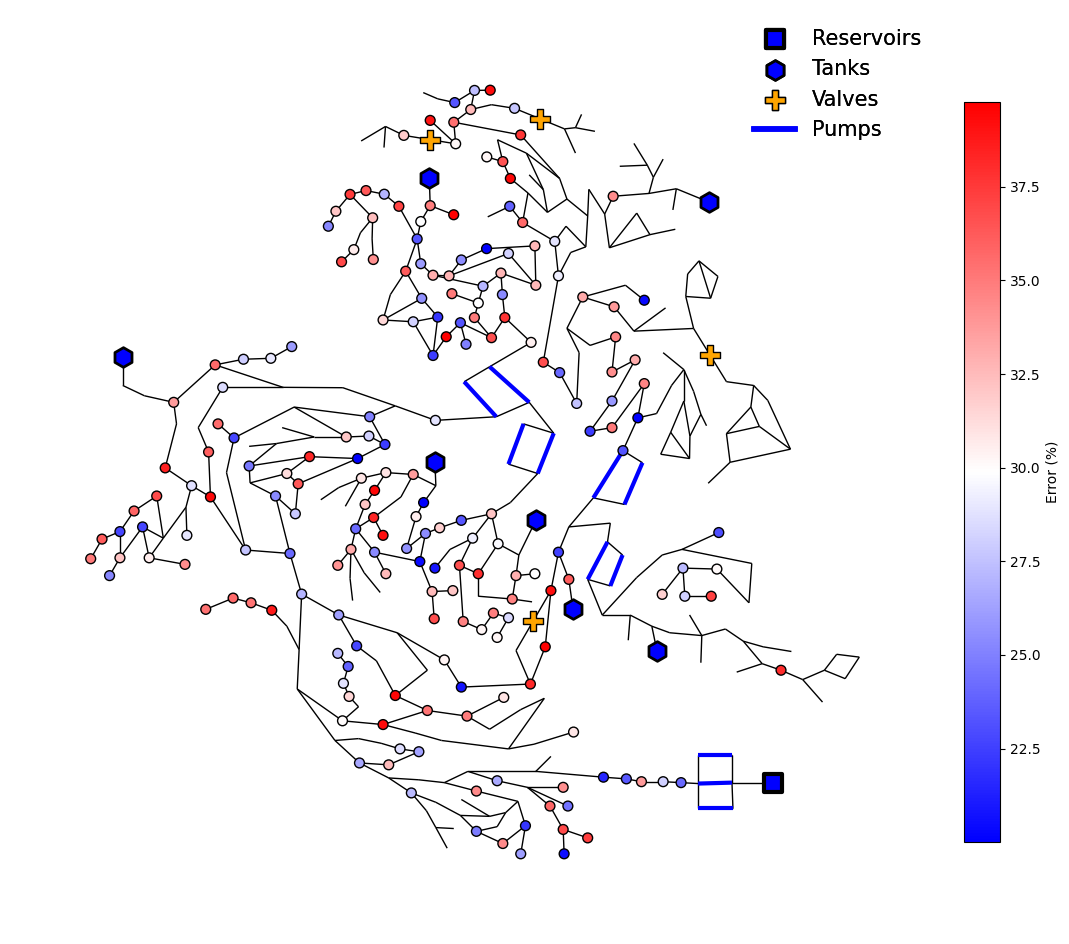

In [18]:
model.plot_unique_data(parameter = "custom_data", node_size = 200,
                       line_widths = 1, edge_colors = "k",
                       parameter_type = "node", data_type = "continuous",    
                       custom_data_values = [wn.junction_name_list[:200], node_num_data[:200]],
                       #node_sizes = list(random.sample(range(100,200), 200)),
                       color_bar_title = "Error (%)", cmap = "bwr",
                       base_node_size = 30, base_node_color = 'k')       # the nodes not in element list should show up right?

#### Node - discrete.  all good except for color_list

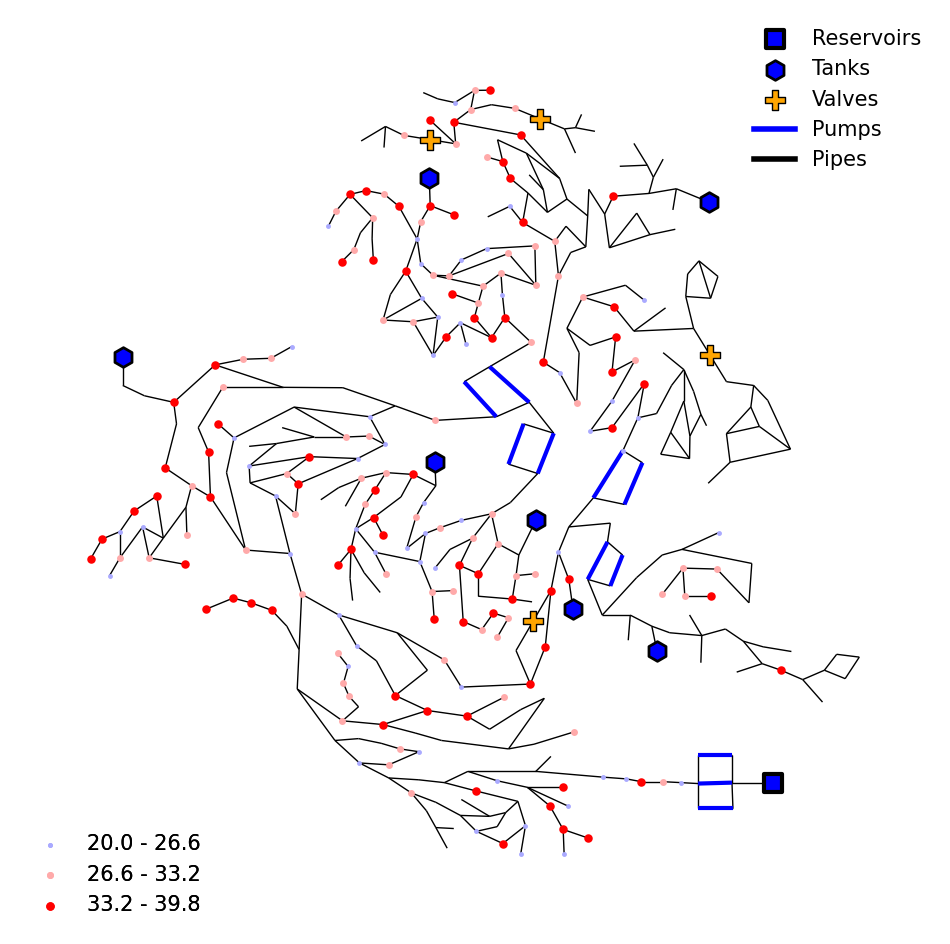

In [19]:
model.plot_unique_data(parameter = "custom_data", node_size = 200,
                       line_widths = 1, edge_colors = "k",
                       parameter_type = "node", data_type = "discrete",    
                       custom_data_values = [wn.junction_name_list[:200], node_num_data[:200]],
                       discrete_legend_loc = 'lower left',
                       num_intervals = 3, legend_sig_figs = 1,
                       interval_node_size_list = [50,100,150],
                       #color_list = ['r','b','k'],
                       color_bar_title = "Error (%)", cmap = "bwr",
                       base_node_size = 30, base_node_color = 'k')       

#### Node - unique. Not working?

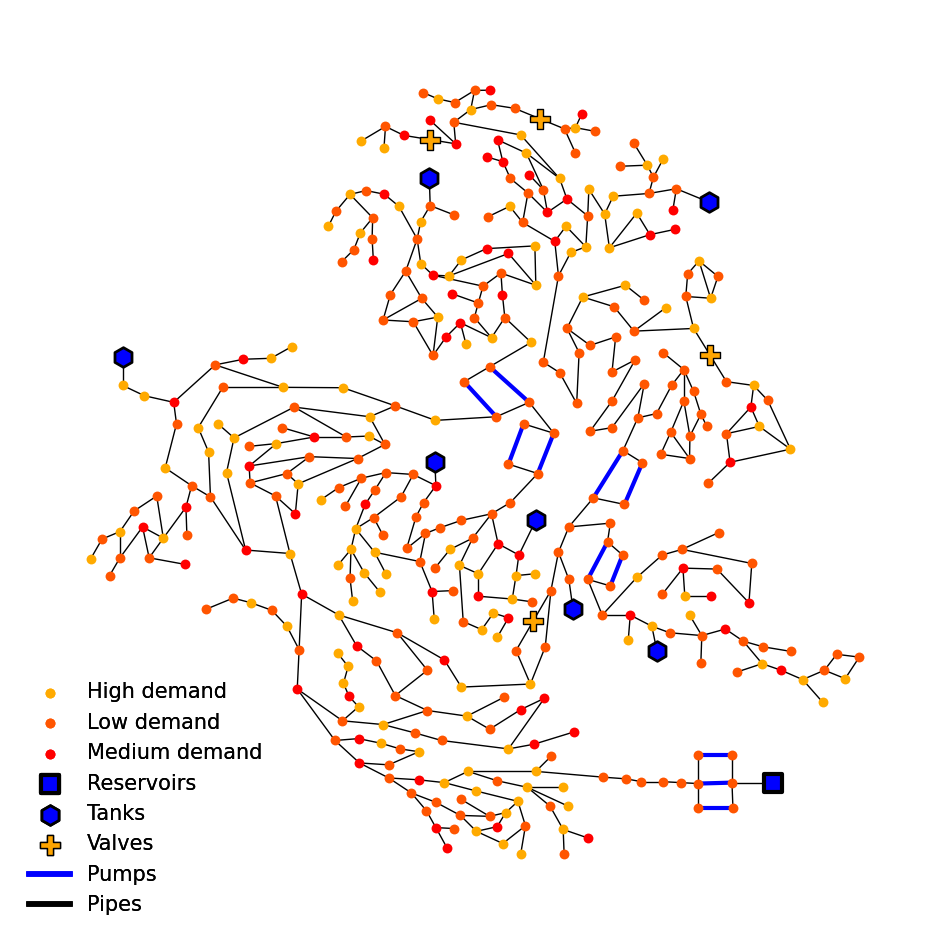

In [20]:
model.plot_unique_data(parameter = "custom_data", node_size = 200,
                       line_widths = 1, edge_colors = "k",
                       parameter_type = "node", data_type = "unique",    
                       custom_data_values = [wn.junction_name_list, node_cat_data],
                       discrete_legend_loc = 'lower left',
                       #num_intervals = 3, legend_sig_figs = 1,
                       #interval_node_size_list = [50,100,150],
                       #color_list = ['r','b','k'],
                       #color_bar_title = "Error (%)", cmap = "bwr",
                       base_node_size = 30, base_node_color = 'k')    

#### Link - unique. doesn't work

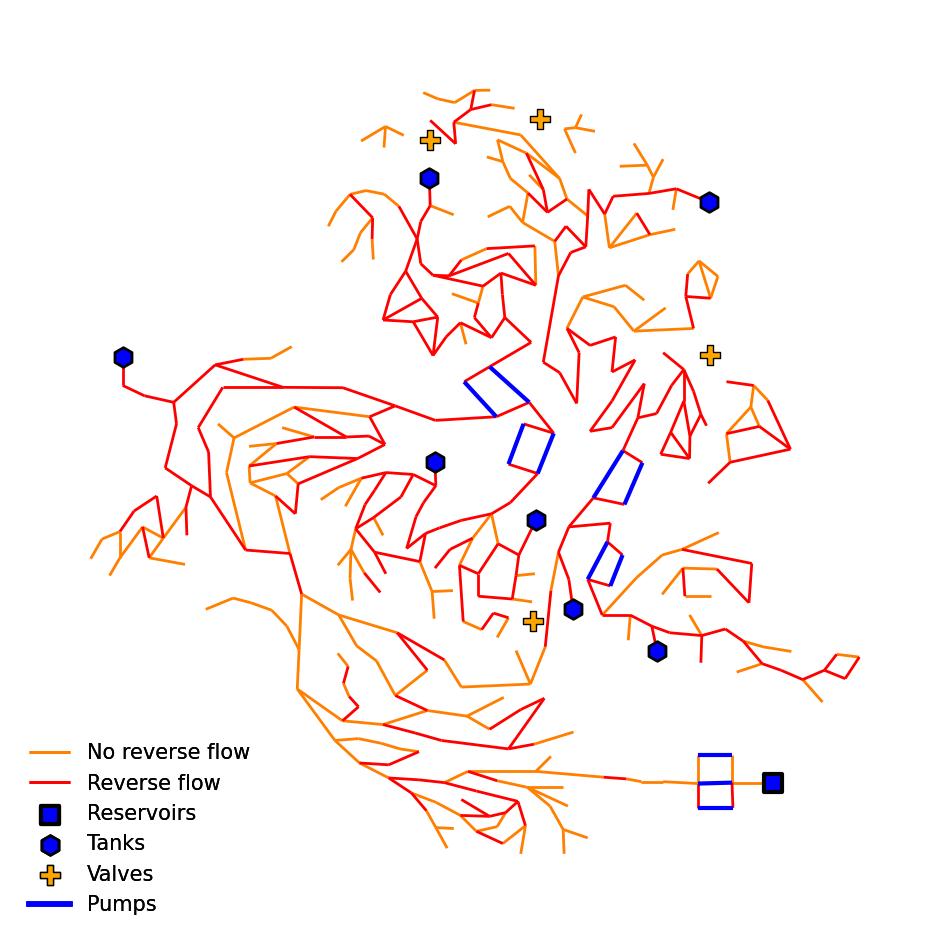

In [21]:
model.plot_unique_data(parameter = "custom_data", #node_size = 200,
                       #line_widths = 1, edge_colors = "k",
                       parameter_type = "link", data_type = "unique",    
                       custom_data_values = [wn.pipe_name_list, link_cat_data],
                       discrete_legend_loc = 'lower left',
                       #num_intervals = 3, legend_sig_figs = 1,
                       #interval_node_size_list = [50,100,150],
                       #color_list = ['r','b','k'],
                       #color_bar_title = "Error (%)", cmap = "bwr",
                       base_node_size = 30, base_node_color = 'k')    

### Link - continuous.

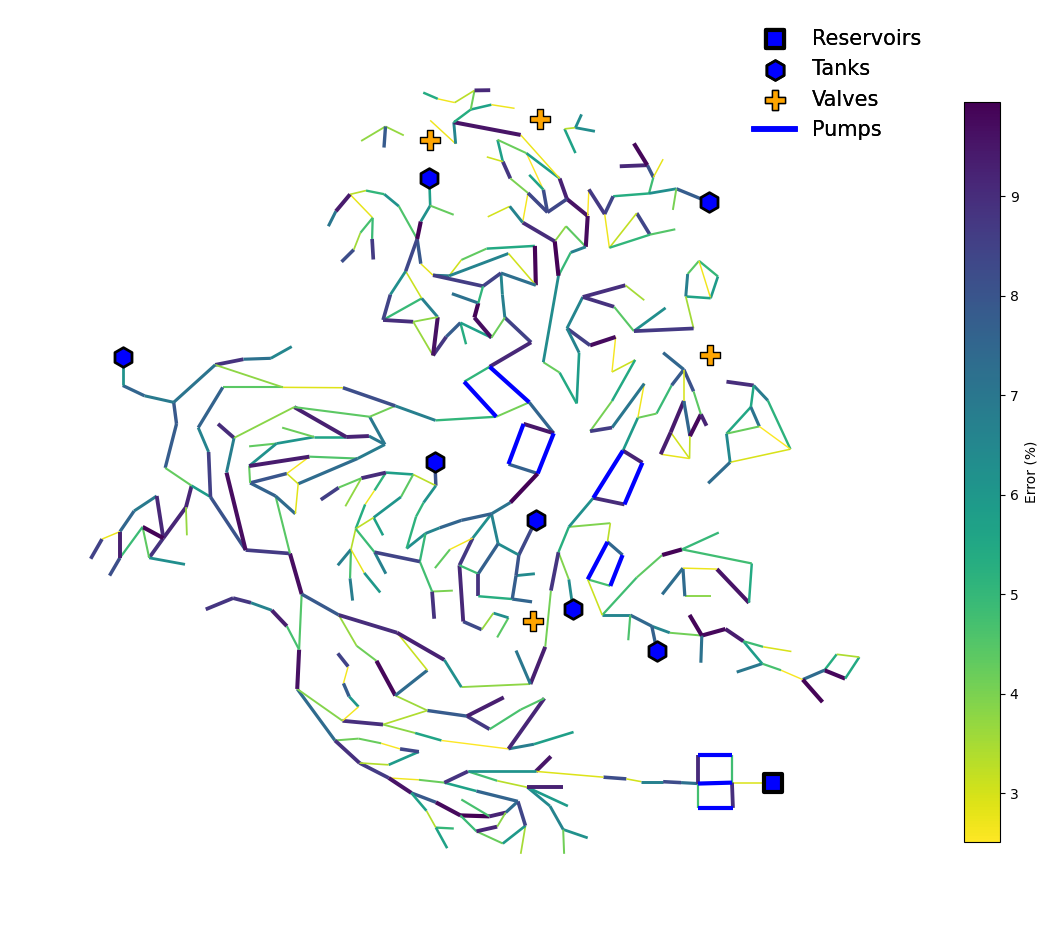

In [22]:
model.plot_unique_data(parameter = "custom_data", node_size = 200,
                       #line_widths = 1, edge_colors = "k",
                       parameter_type = "link", data_type = "continuous",    
                       custom_data_values = [wn.pipe_name_list, link_num_data],
                       discrete_legend_loc = 'lower left',
                       #num_intervals = 3, legend_sig_figs = 1,
                       #interval_node_size_list = [50,100,150],
                       #color_list = ['r','b','k'],
                       color_bar_title = "Error (%)", cmap = "viridis_r",
                       min_width = 1, max_width = 3,
                       base_node_size = 30, base_node_color = 'k')    

#### Link - discrete.

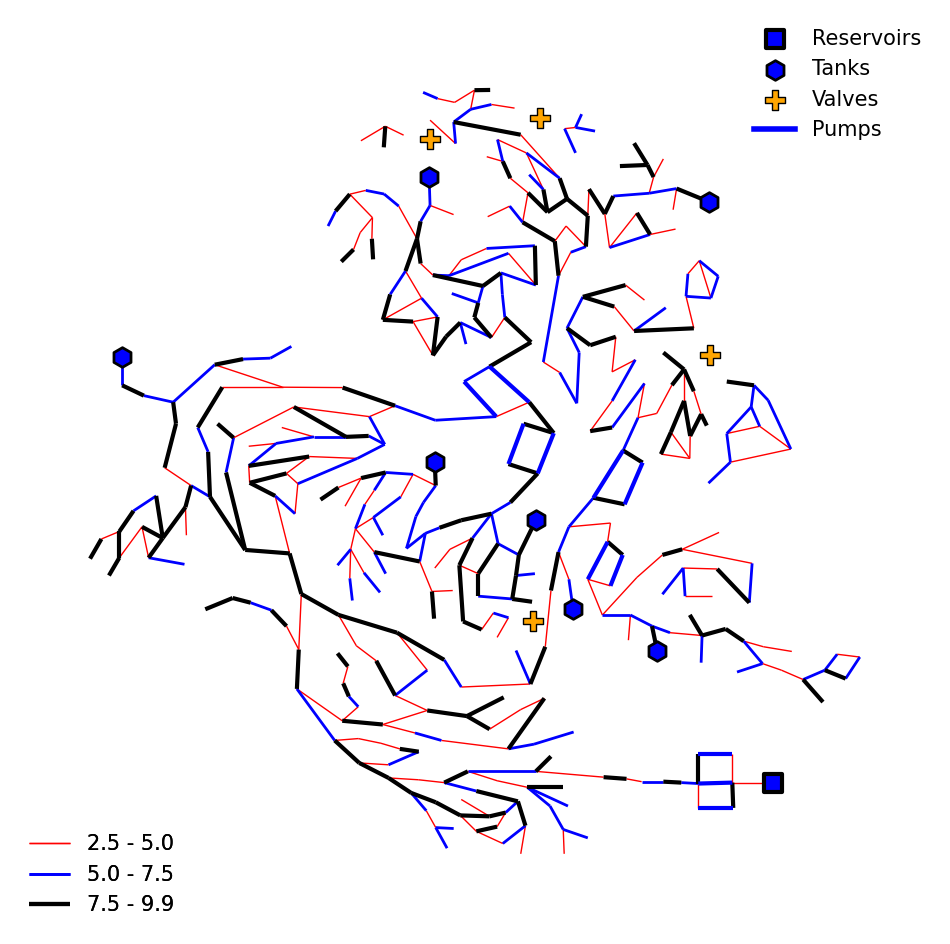

In [23]:
model.plot_unique_data(parameter = "custom_data", node_size = 200,
                       #line_widths = 1, edge_colors = "k",
                       parameter_type = "link", data_type = "discrete",    
                       custom_data_values = [wn.pipe_name_list, link_num_data],
                       discrete_legend_loc = 'lower left',
                       num_intervals = 3, legend_sig_figs = 1,
                       interval_link_width_list = [1,2,3],
                       color_list = ['r','b','k'],
                       color_bar_title = "Error (%)", cmap = "viridis_r",
                       base_node_size = 30, base_node_color = 'k')    